# Introduction
In this project we are going to analyze 'brain tumor dataset' T1 weighted images dataset from figshare,
<br>
apply some custom functions and Convolutional neural network model that predicts brain tumor type from given image.
#### This project inludes:
- Image data analysis
- Preprocessing data
- Creating neural network model
<br>

Highly reccomended to read the **data-description.txt** file to understand data organization.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import cv2 as cv
import os
from PIL import Image

# I Data preview
#### Step 1 - Image extraction
We're going to convert .mat files to .jpg files. This process basically had me to look at result folder manually to test the conversion by eye.
<br><br>
Preprocessing images:
1) Denoising
2) Exposure
3) Contrast stretching
4) Value scaling

In [6]:
mat_path = 'D:\\data-science\\brain-tumor-data\\mat'
data_path = 'D:\\data-science\\brain-tumor-data\\images'
label_names = ['meningioma', 'glioma', 'pituitary']
matrices = os.listdir(mat_path)

In [52]:
import h5py
from skimage import exposure

mat_path = 'D:\\data-science\\brain-tumor-data\\mat'
data_path = 'D:\\data-science\\brain-tumor-data\\images'
label_names = ['meningioma', 'glioma', 'pituitary']
matrices = os.listdir(mat_path)

for _ in range(4):
    for i, mat in enumerate(matrices[:3]):
        with h5py.File(f"{mat_path}\\{mat}", 'r') as file:
            image = file['cjdata']['image']
            label = int(file['cjdata']['label'][0]) - 1

            image = np.array(image)
            
            #normalize img values to [min, max] = [0, 1] and multiply to [0, 255]
            image = image / np.max(image) * 255
            # image[image <= 10] = 0
            image = image.astype(np.uint8)

        
            # denoise
            # image[image <= 10] = 0

            # 1 exposure
            if _ == 1:
                pass
                image = exposure.equalize_hist(image) * 255
                image = np.array(image)
                image = image.astype(np.uint8)

            # 2 contrast scaling
            if _ == 2:
                # image[image <= 5] = 0
                image = exposure.equalize_hist(image) * 255
                image = (image - (image.min())) / (image.max() - (image.min())) * 255
                image = np.array(image).astype(np.uint8)

            # 3 denoise + scale
            if _ == 3:
                image[image <= 10] = 0
                
                image = exposure.equalize_hist(image) * 255
                image = (image - (image.min())) / (image.max() - (image.min())) * 255
                
                
                image = np.array(image).astype(np.uint8)

            img_values = Image.fromarray(image)

            file_name = label_names[label] + f"_{i}_{_}.png"
            img_values.save(data_path + '\\test\\' + label_names[label] + '\\' + file_name)

C:\Users\ati\AppData\Local\Temp\ipykernel_11580\3227338917.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(file['cjdata']['label'][0]) - 1


In [88]:
import h5py
from skimage import exposure
mat_path = 'D:\\data-science\\brain-tumor-data\\mat'
data_path = 'D:\\data-science\\brain-tumor-data\\images'
label_names = ['meningioma', 'glioma', 'pituitary']
matrices = os.listdir(mat_path)

for i, mat in enumerate(matrices):
    with h5py.File(f"{mat_path}\\{mat}", 'r') as file:
        image = file['cjdata']['image']
        label = int(file['cjdata']['label'][0]) - 1
        print(f"{i} / 3064")

        # taking off 'near black' values to reduce background noise
        image = np.array(image)
        image[image <= 80] = 0

        # function that fixes exposure
        image = exposure.equalize_hist(image)

        # contrast stretching, and value scaling
        image = 255 * (image - (image.min())) / (image.max() - (image.min()))

        image = np.array(image).astype(np.uint8)
        img_values = Image.fromarray(image)

        file_name = label_names[label] + f"_{i}.png"
        img_values.save(data_path + '\\' + label_names[label] + '\\' + file_name)

C:\Users\ati\AppData\Local\Temp\ipykernel_11580\833496482.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(file['cjdata']['label'][0]) - 1


0 / 3064
1 / 3064
2 / 3064
3 / 3064
4 / 3064
5 / 3064
6 / 3064
7 / 3064
8 / 3064
9 / 3064
10 / 3064
11 / 3064
12 / 3064
13 / 3064
14 / 3064
15 / 3064
16 / 3064
17 / 3064
18 / 3064
19 / 3064
20 / 3064
21 / 3064
22 / 3064
23 / 3064
24 / 3064
25 / 3064
26 / 3064
27 / 3064
28 / 3064
29 / 3064
30 / 3064
31 / 3064
32 / 3064
33 / 3064
34 / 3064
35 / 3064
36 / 3064
37 / 3064
38 / 3064
39 / 3064
40 / 3064
41 / 3064
42 / 3064
43 / 3064
44 / 3064
45 / 3064
46 / 3064
47 / 3064
48 / 3064
49 / 3064
50 / 3064
51 / 3064
52 / 3064
53 / 3064
54 / 3064
55 / 3064
56 / 3064
57 / 3064
58 / 3064
59 / 3064
60 / 3064
61 / 3064
62 / 3064
63 / 3064
64 / 3064
65 / 3064
66 / 3064
67 / 3064
68 / 3064
69 / 3064
70 / 3064
71 / 3064
72 / 3064
73 / 3064
74 / 3064
75 / 3064
76 / 3064
77 / 3064
78 / 3064
79 / 3064
80 / 3064
81 / 3064
82 / 3064
83 / 3064
84 / 3064
85 / 3064
86 / 3064
87 / 3064
88 / 3064
89 / 3064
90 / 3064
91 / 3064
92 / 3064
93 / 3064
94 / 3064
95 / 3064
96 / 3064
97 / 3064
98 / 3064
99 / 3064
100 / 3064

In [ ]:
import h5py
from skimage import exposure
mat_path = 'D:\\data-science\\brain-tumor-data\\mat'
data_path = 'D:\\data-science\\brain-tumor-data\\images'
label_names = ['meningioma', 'glioma', 'pituitary']
matrices = os.listdir(mat_path)

for i, mat in enumerate(matrices):
    with h5py.File(f"{mat_path}\\{mat}", 'r') as file:
        image = file['cjdata']['image']
        label = int(file['cjdata']['label'][0]) - 1

        # taking off 'near black' values to reduce background noise
        image = np.array(image)
        image[image <= 80] = 0

        # function that fixes exposure
        image = exposure.equalize_hist(image)

        # contrast stretching, and value scaling
        image = 255 * (image - (image.min())) / (image.max() - (image.min()))

        image = np.array(image).astype(np.uint8)
        img_values = Image.fromarray(image)

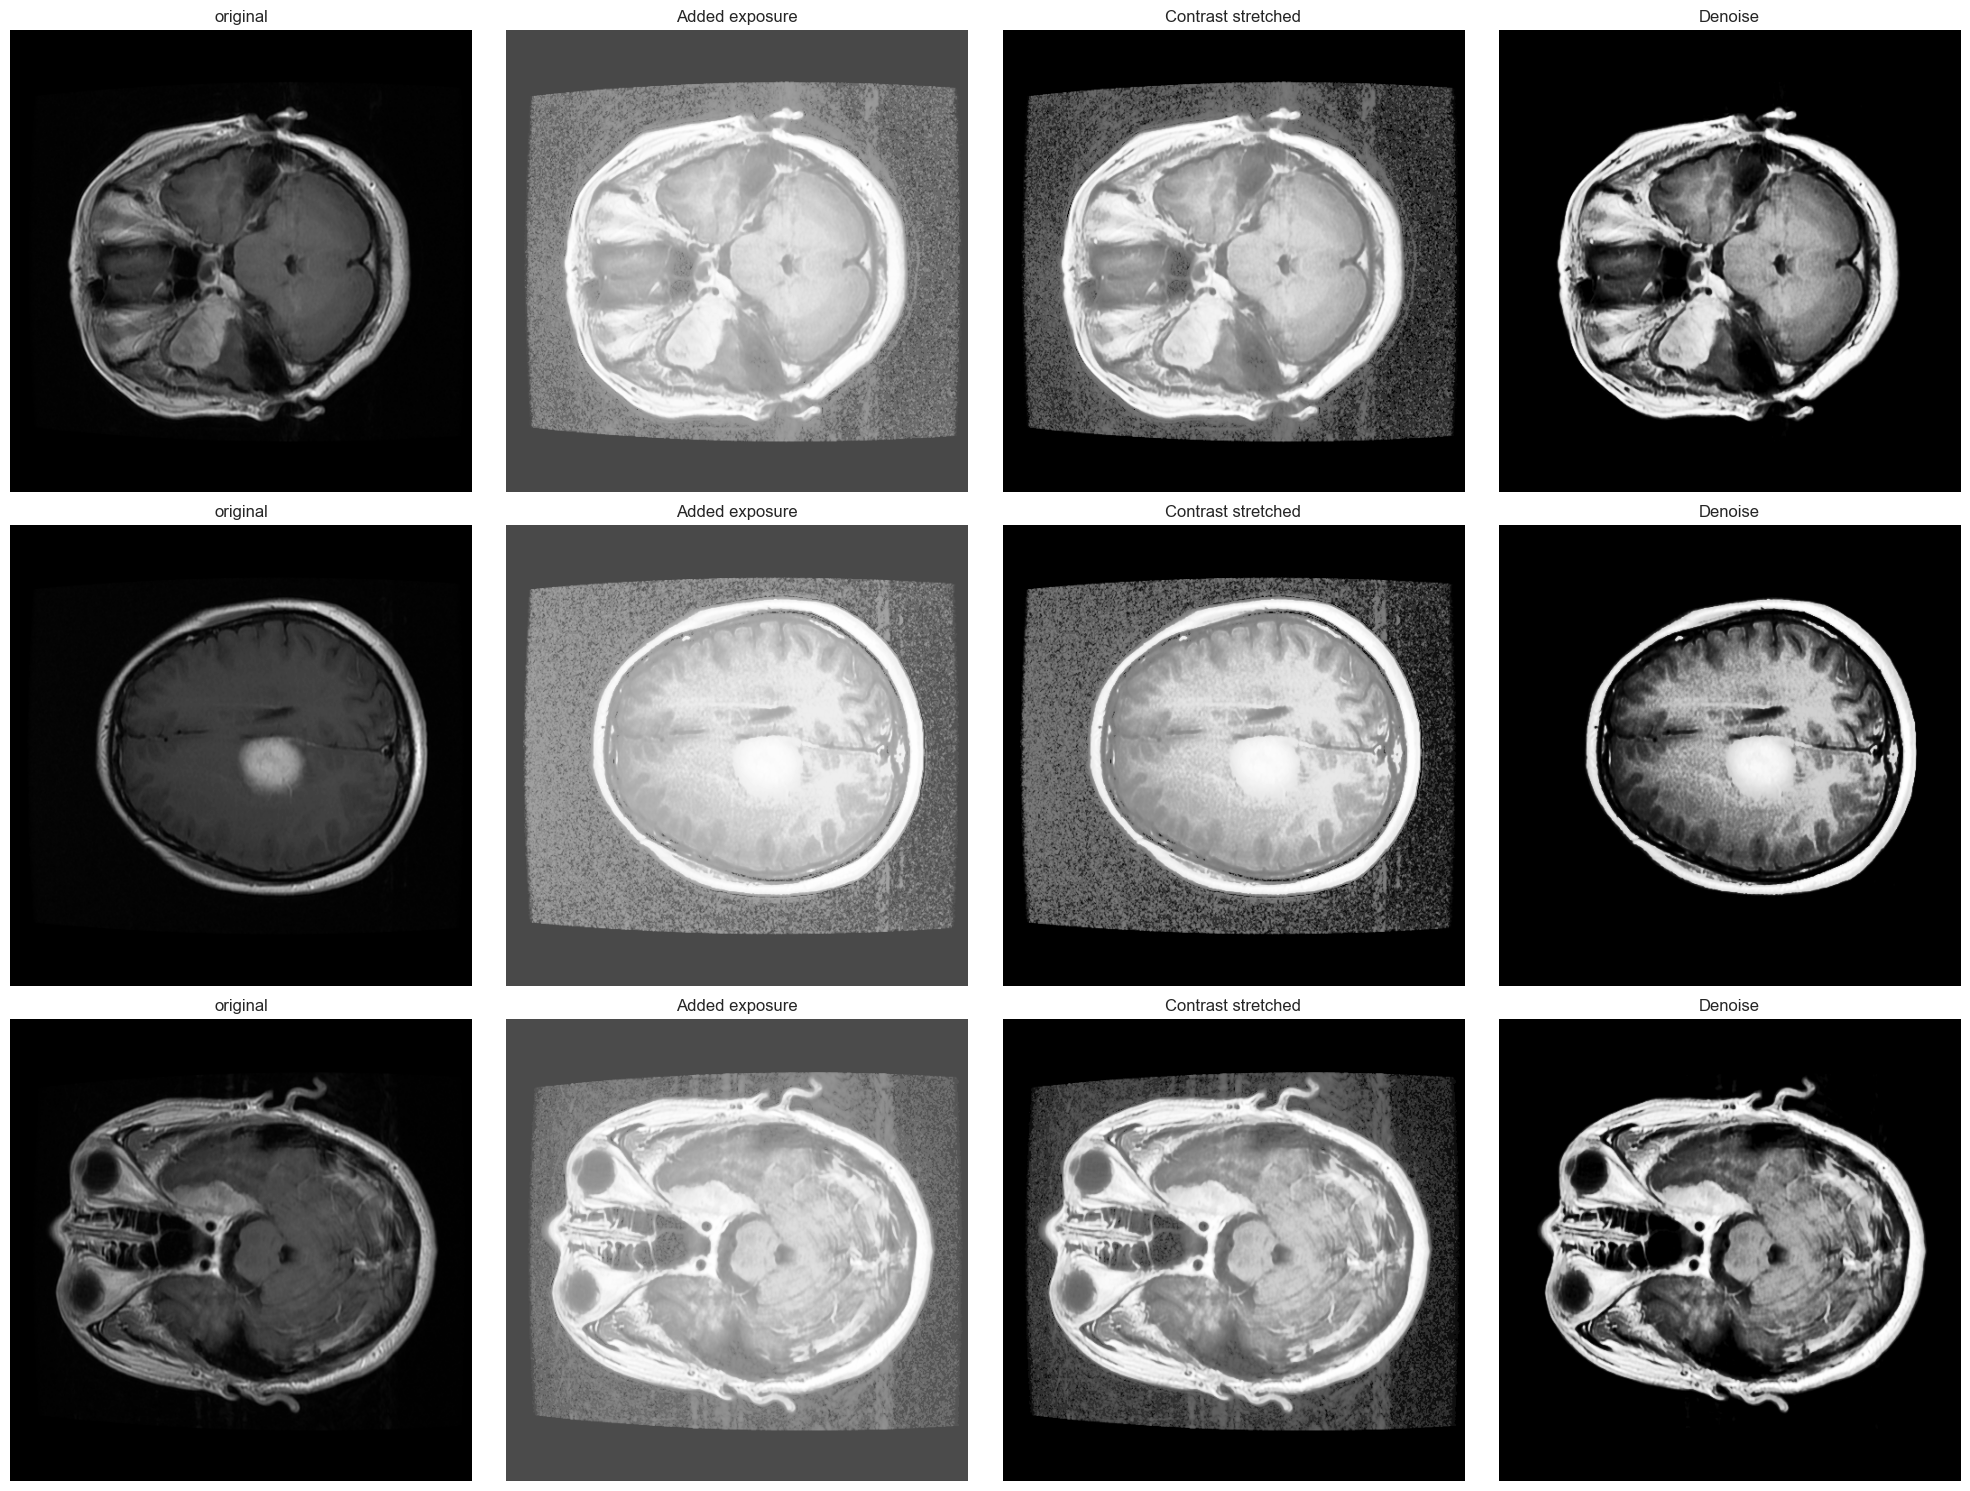

In [90]:
test_path = 'D:\\data-science\\brain-tumor-data\\test\\meningioma'
test_files = os.listdir(test_path)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

for i, file in enumerate(test_files):
    img = Image.open(test_path + '\\' + file)
    y, x = [int(x[0]) for x in file.split('_')[1:]]
    
    axes[y, x].imshow(img, cmap='grey', vmin=0, vmax=255)
    axes[y, x].set_axis_off()
    axes[y, 0].set_title('original')
    axes[y, 1].set_title('Added exposure')
    axes[y, 2].set_title('Contrast stretched')
    axes[y, 3].set_title('Denoise')

plt.tight_layout()

We only want the image and label. We want to train our model to learn from it by itself.

In [91]:
data = tf.keras.utils.image_dataset_from_directory(data_path, batch_size=8, color_mode='grayscale', image_size=(256, 256))
label_names = data.class_names
print(f"Labels: {label_names}\n")

Found 3064 files belonging to 3 classes.
Labels: ['glioma', 'meningioma', 'pituitary']



In [92]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

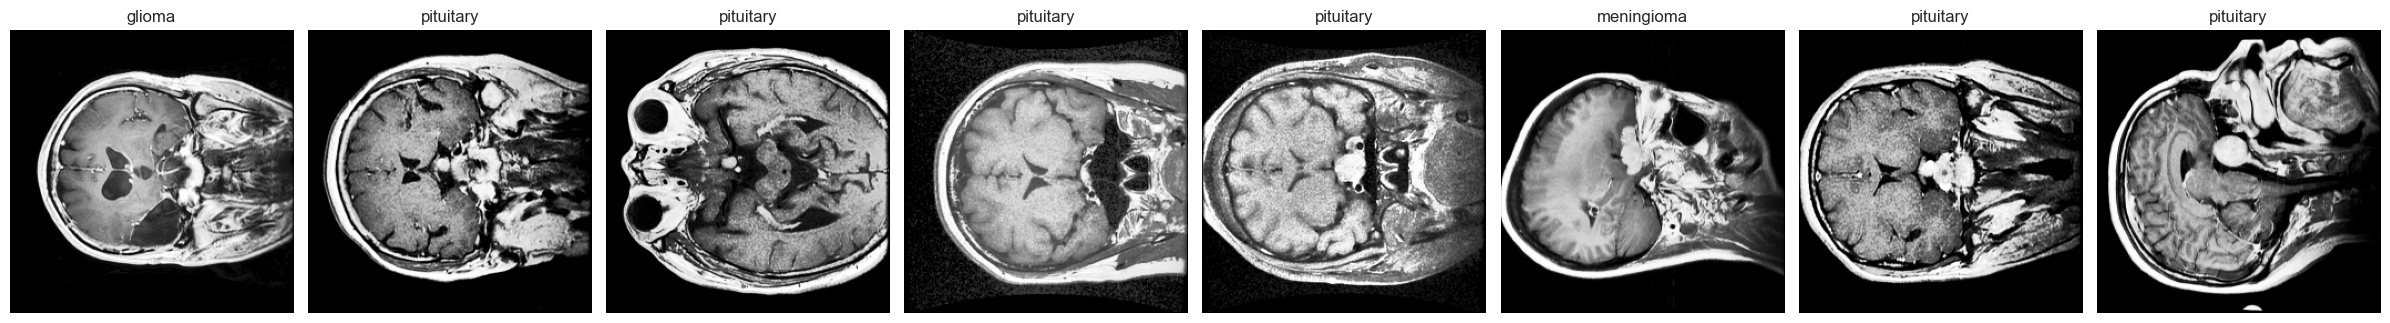

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(24, 6))
for i, img in enumerate(batch[0][:8]):
    class_name = label_names[batch[1][i]]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(class_name)
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

    glioma: 1426
meningioma: 708
 pituitary: 930


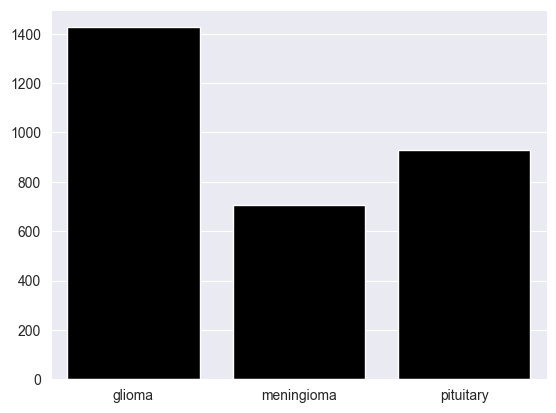

In [94]:
files_per_label = lambda x: os.listdir(data_path + '\\' + x)

labels_len = {label: len(files_per_label(label)) for label in label_names}

sb.barplot(data=labels_len, x=labels_len.keys(), y=labels_len.values(), color='Black')

for label in label_names:
    print(f"{label:>10}: {len(os.listdir(f"{data_path}\\{label}"))}")
    
plt.show()

Our dataset contains 512px x 512px images and each pixel has 3 channels so basically each image contains **786 432** values,
<br>
by using *color_mode = 'grayscale'* we reduce it to **262 144**. Also keras resized our files to size of 256px x 256px so we end up with **65 536** values per image.
<br><br>
I tested downsampling by removing random files from glioma and pituitary folders. However it didn't help at all, it even dropped accuracy by almost 10%.

# II Feature scaling
Scaling our values from range (0, 255) to (0, 1) will help our optimization algorithm (Adam).
<br><br>
x = image values
<br> 
y = labels

In [95]:
print(batch[0].min(), batch[0].max(), sep='\n')

0.0
254.25


In [96]:
data = data.map(lambda x, y: (x/255, y))

In [97]:
iterator = data.as_numpy_iterator()
batch = iterator.next()

min_value = iterator.next()[0].min()
max_value = iterator.next()[0].max()

print(min_value, max_value, sep='\n')

0.0
0.9970588


Checking black/white balance in images. For selecting reference point on scale I used harmonic mean because it favortise lower values.
<br>
Every point on the plot is a single image, we can see that most of images hang around ratio of 0.19

          Mean: 0.4798710346221924
 Harmonic mean: 0.47953394055366516


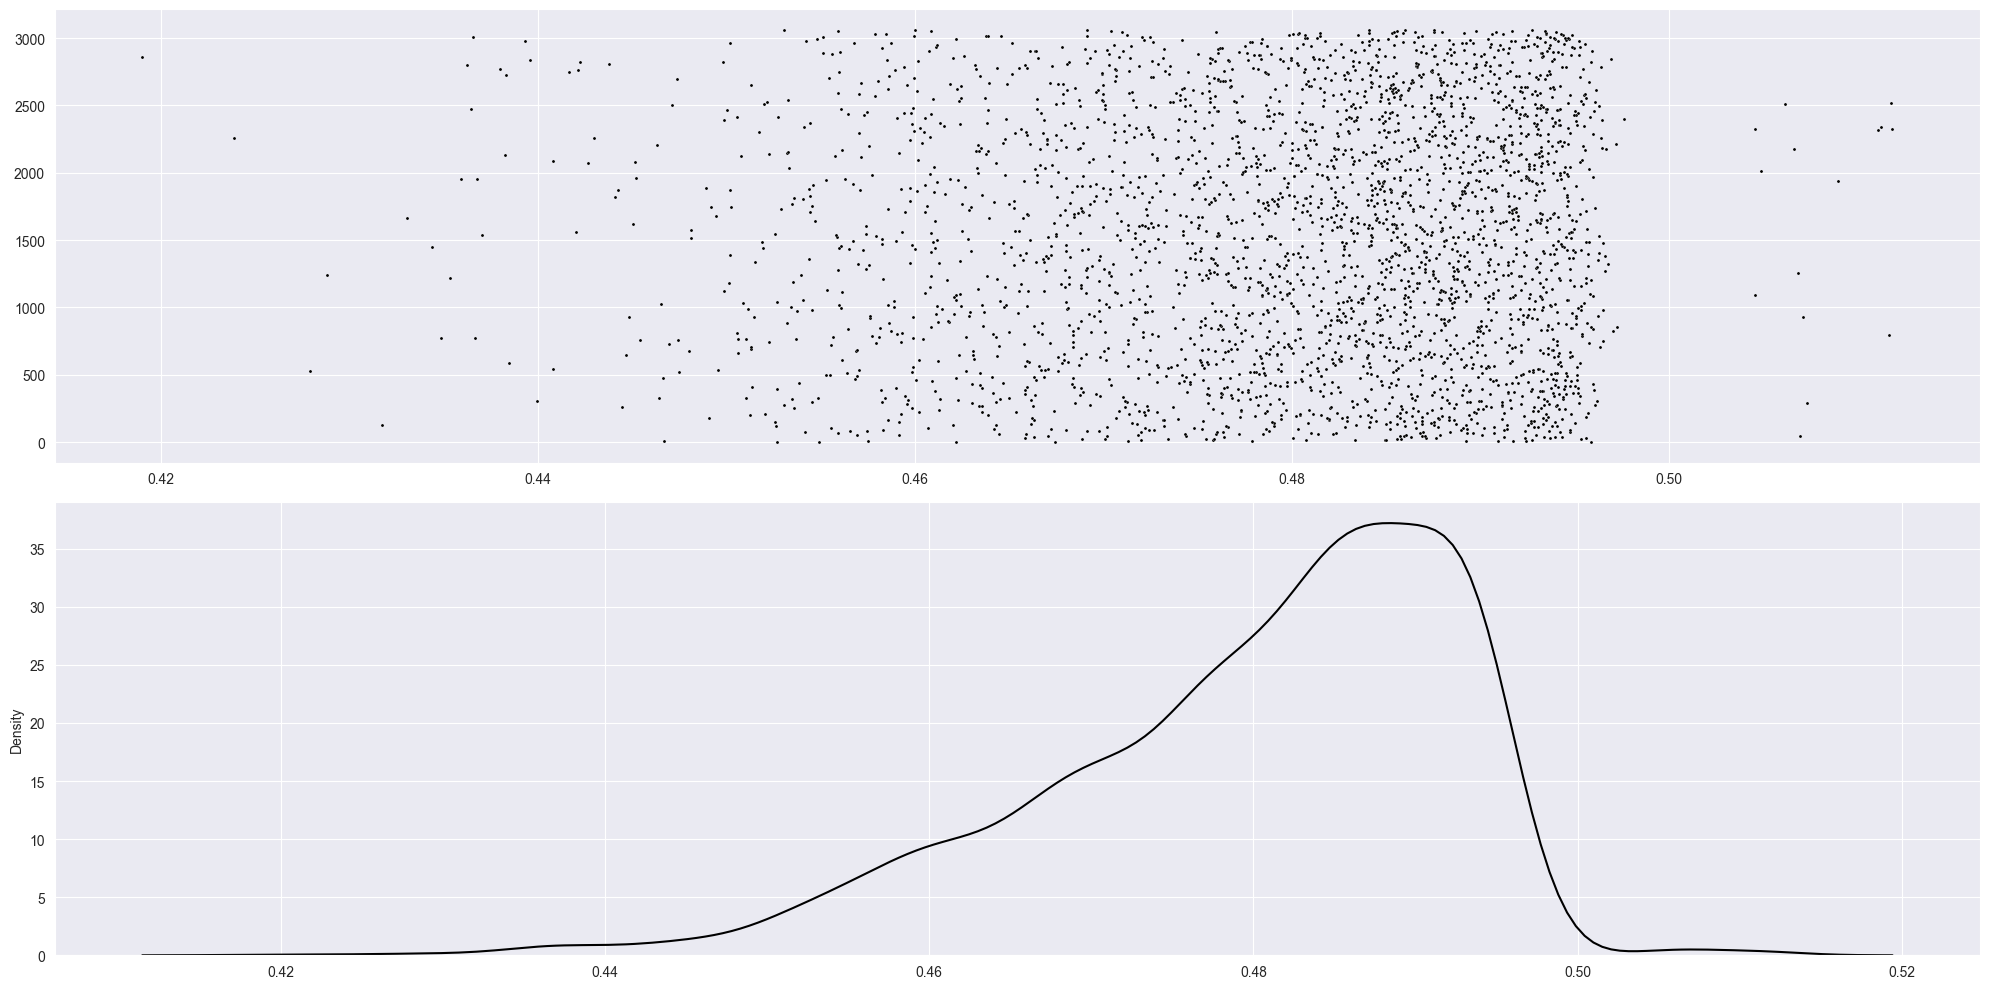

In [98]:
from scipy.stats.mstats import hmean

all_images = []
for images, label in data:
    all_images.append(images.numpy())

all_images = np.concatenate(all_images, axis=0)
# skipping value 0 because it's background and it will lower our mean
all_means = [x[x != 0].mean() for x in all_images]

print(f'{'Mean':>14}: {np.mean(all_means)}\n'
      f'{'Harmonic mean':>14}: {hmean(all_means)}')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
sb.scatterplot(y=[x for x in range(len(all_means))], x=all_means, color='black', s=5, ax=axes[0])
sb.kdeplot(x=all_means, color='black', ax=axes[1])
plt.tight_layout()

###### THIS FUNCTION WAS USED IN OLD DATASET WHERE MEAN VALUES WERE SPREAD MORE

In [99]:
def scale_to_target(batch, target=0.5, multiplier=1):
    f"""
    This function scales image values inside given array to achieve mean value that equals target value.\n
    mean of array => target\n
    array - the array to be scaled\n
    target - value that we want our mean of given array to become\n
    multiplier - % of effect, 0.5 is basically mean of our array mean and target value
    """
    def scale_single_image(img):
        current_mean = tf.reduce_mean(img)
        new_mean = current_mean + (multiplier * (target - current_mean))
        scale_factor = new_mean / current_mean if current_mean != 0 else tf.cast(0, dtype=new_mean.dtype)
        return img * scale_factor

    scaled_batch = tf.map_fn(scale_single_image, batch)
    return scaled_batch

# III Creating CNN Model
- In short convolutional neural network base on layers that convolve input matrix (image) through filter matrices resulting filtered output.
<br>
- As input shape we apply values that corresponds to:
    - width = 256
    - height = 256
    - channel = 1 (we use grayscaled images).
<br>
- __*ReLU*__ activation function cleans our output from all unecesary negative values, replacing them with zeros that came from filter multiplication.
<br>
- Since our dataset contain 4 classes I applied __*softmax*__ activation to last step.

In [100]:
train_batch_size = round(len(data) * 0.7)
val_batch_size = round(len(data) * 0.2)
test_batch_size = round(len(data) * 0.1)

len(data) == train_batch_size + val_batch_size + test_batch_size

True

In [101]:
train = data.take(train_batch_size)
val = data.skip(train_batch_size).take(val_batch_size)
test = data.skip(train_batch_size + val_batch_size).take(test_batch_size)

print(
    f"train: {len(train)} batches\nval: {len(val)} batches\ntest: {len(test)} batches"
)

train: 268 batches
val: 77 batches
test: 38 batches


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [103]:
def create_model(num_layers = 1, num_filters = 16, kernel_size = 3, regulate = 0.0001, learning_rate = 0.001):
    
    model = Sequential()
    
    model.add(Input(shape=(256, 256, 1)))
    
    model.add(Conv2D(num_filters, (kernel_size, kernel_size), 1, activation='relu'))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(num_filters*2, (kernel_size, kernel_size), 1, activation='relu'))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(num_filters, (kernel_size, kernel_size), 1, activation='relu'))
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(regulate)))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [110]:
model = create_model(regulate=0.0001, learning_rate=0.0001)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,108 (14.10 MB)

 Trainable params: 3,697,108 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
callback_board = tf.keras.callbacks.TensorBoard('data_processed_imgs')

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[callback_board])

Epoch 1/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - accuracy: 0.6255 - loss: 0.8874 - val_accuracy: 0.7386 - val_loss: 0.6650
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.7384 - loss: 0.5917 - val_accuracy: 0.7744 - val_loss: 0.4996
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - accuracy: 0.7933 - loss: 0.5105 - val_accuracy: 0.8588 - val_loss: 0.3957
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.8350 - loss: 0.3955 - val_accuracy: 0.8750 - val_loss: 0.3551
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.8669 - loss: 0.3412 - val_accuracy: 0.8912 - val_loss: 0.3128
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.9023 - loss: 0.2809 - val_accuracy: 0.8831 - val_loss: 0.3185
Epoch 7/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.9246 - loss: 0.2379 - val_accuracy: 0.9026 - val_loss: 0.2714
Epoch 8/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9388 - loss: 0.2079 - 

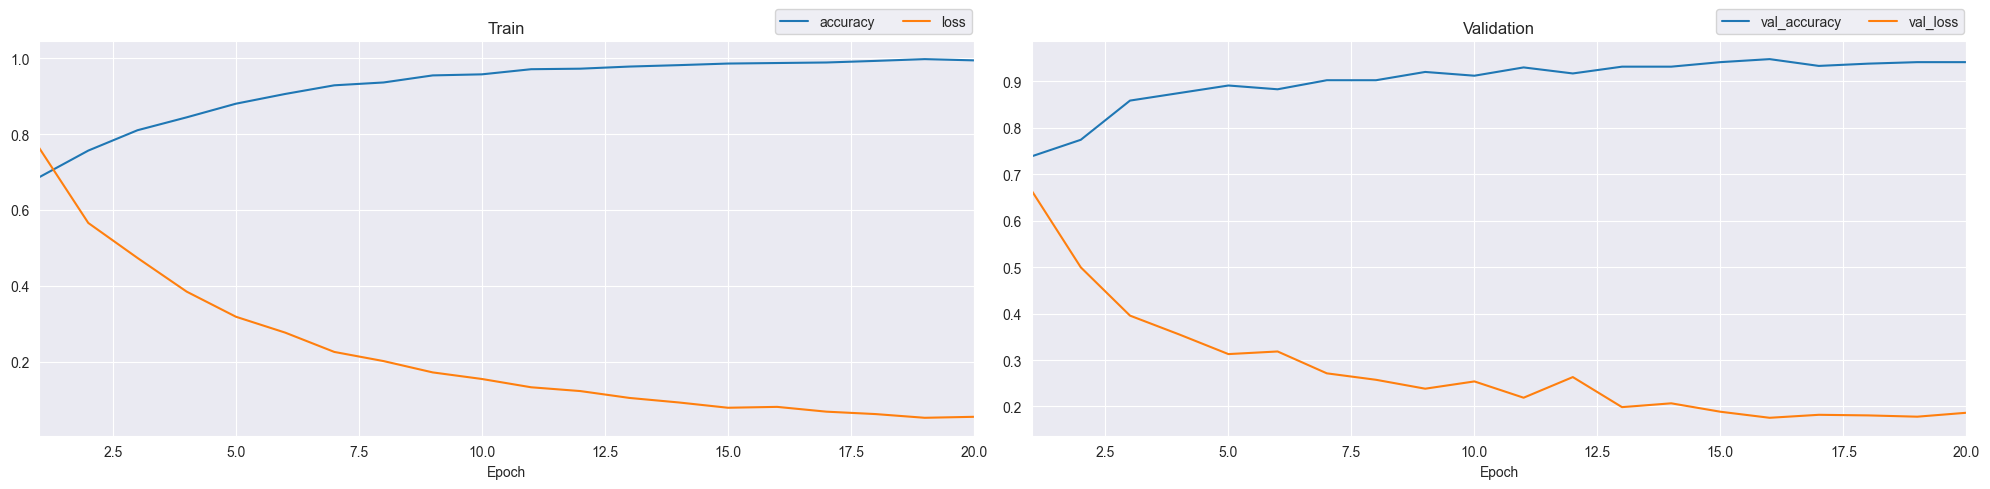

In [114]:
acc_labels = list(hist.history.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
for i in range(4):
    fig = sb.lineplot(y=hist.history[acc_labels[i]], x=[x for x in range(1, 21, 1)], label=acc_labels[i], ax=axes[i//2])
    axes[i//2].legend(loc='lower right', bbox_to_anchor=(1.005, 1), ncol=2)

axes[0].set_title('Train')
axes[0].set_xlabel('Epoch')
axes[0].set_xlim([1, 20])

axes[1].set_title('Validation')
axes[1].set_xlabel('Epoch')
axes[1].set_xlim([1, 20])

plt.tight_layout()
plt.show()

In [115]:
y_true = []
y_pred = []

for batch_images, batch_labels in test:
    y_true_batch = batch_labels
    y_pred_batch = np.argmax(model.predict(batch_images, verbose=0), axis=1)

    y_true.extend(y_true_batch)
    y_pred.extend(y_pred_batch)

              precision    recall  f1-score   support

      glioma       0.94      0.91      0.92       134
  meningioma       0.87      0.89      0.88        84
   pituitary       0.95      0.98      0.97        86

    accuracy                           0.92       304
   macro avg       0.92      0.93      0.92       304
weighted avg       0.92      0.92      0.92       304



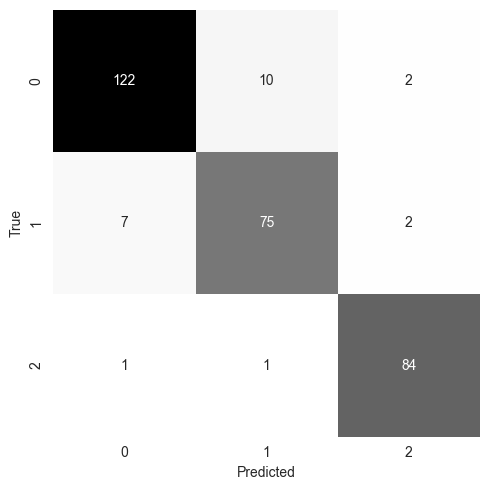

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred, target_names=label_names)
print(report)

cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig = plt.figure(figsize=(5, 5))
fig = sb.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()